In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np

In [2]:
# Загрузка библиотек для графиков
import seaborn as sns
from matplotlib import pyplot as plt

# Режим отображения -> SVG
%config InlineBackend.figure_format = 'svg'

In [4]:
# Загрузка очищенной базы данных
db = pd.read_excel('proc_db1.xlsx')
db.head()

,Nanoparticle,coat,Diameter (nm),Concentration μM,Zeta potential (mV),Cells,Cell line (L)/primary cells (P),Human(H)/Animal(A) cells,Cell morphology,Cell-organ/tissue source,...,Test,Test indicator,Biochemical metric,% Cell viability,Interference checked (Y/N),Colloidal stability checked (Y/N),Positive control (Y/N),Animal,Type,Cell age
0,CeO2,nothing,20.3,0.002478,-8.0,L929,L,A,Fibroblast,Areolar tissue,...,MTT,tetrazolium salt,cell metabolic activity,100.00000,N,N,N,rat,1,A
1,CeO2,nothing,20.3,0.004956,-8.0,L929,L,A,Fibroblast,Areolar tissue,...,MTT,tetrazolium salt,cell metabolic activity,100.00000,N,N,N,rat,1,A
2,CeO2,nothing,20.3,0.009911,-8.0,L929,L,A,Fibroblast,Areolar tissue,...,MTT,tetrazolium salt,cell metabolic activity,100.00000,N,N,N,rat,1,A
3,CeO2,nothing,20.3,0.019823,-8.0,L929,L,A,Fibroblast,Areolar tissue,...,MTT,tetrazolium salt,cell metabolic activity,100.00000,N,N,N,rat,1,A
4,CeO2,nothing,20.3,0.039645,-8.0,L929,L,A,Fibroblast,Areolar tissue,...,MTT,tetrazolium salt,cell metabolic activity,97.53237,N,N,N,rat,1,A


In [5]:
# Целевая переменная
T = '% Cell viability'

<AxesSubplot:xlabel='% Cell viability', ylabel='Count'>

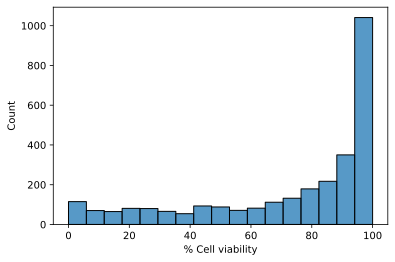

In [7]:
# Построим график распределения
# жизнеспособности клеток
sns.histplot(data=db, x=T)

In [8]:
# Выходит, что клетки в большинстве случаев выживают
# после воздействия на них наночастиц.

<AxesSubplot:xlabel='Animal', ylabel='% Cell viability'>

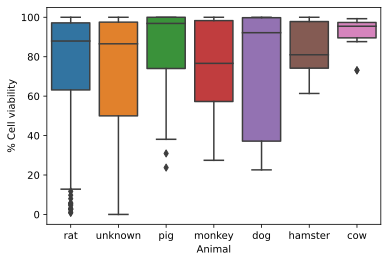

In [9]:
# Посмотрим, у какого животного клетки более устойчивы
sns.boxplot(data=db, y=T, x='Animal')

In [10]:
# Игнорируем колонку 'unknown';
# Сразу видно, что у коровы очень устойчивые клетки;
# А, например, у собаки не самые устойчивые.

<AxesSubplot:xlabel='Type', ylabel='% Cell viability'>

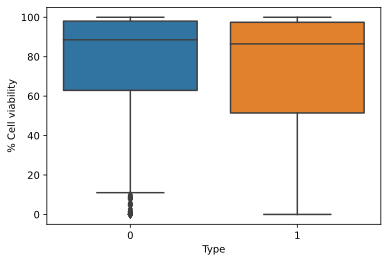

In [12]:
# Посмотрим зависимость между типом НЧ и жизнеспособностью
sns.boxplot(data=db, y=T, x='Type')

In [13]:
# Видим, что органические наночастицы буквально чуть менее токсичны, чем неорг.

<AxesSubplot:xlabel='% Cell viability', ylabel='Diameter (nm)'>

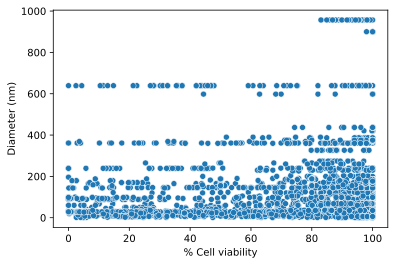

In [14]:
# Посмотрим зависимость жизнеспособности клетки от диаметра НЧ
sns.scatterplot(data=db, x=T, y='Diameter (nm)')

In [15]:
# Можно видеть, что НЧ диаметром под 1000 нм уже не так страшны клеткам.

<AxesSubplot:xlabel='Cell age', ylabel='% Cell viability'>

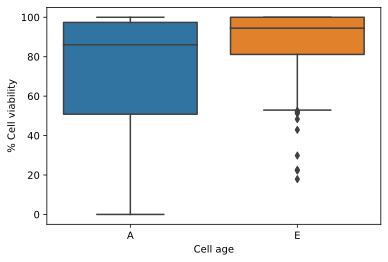

In [16]:
# Посмотрим зависимость возраста клетки от её жизнеспособности
sns.boxplot(data=db, x='Cell age', y=T)

In [17]:
# Видим, что молодые клетки чаще выживают под воздействием НЧ

<AxesSubplot:xlabel='Interference checked (Y/N)', ylabel='% Cell viability'>

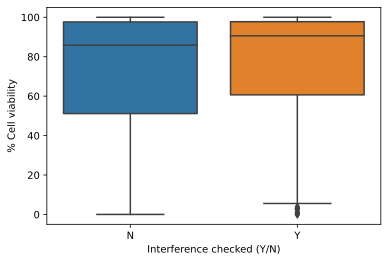

In [18]:
# Посмотрим, как проверка на то что другие реагенты не вмешивались в результаты
# влияет на жизнеспособность клетки
sns.boxplot(data=db, x='Interference checked (Y/N)', y=T)

In [19]:
# Почти не влияет, однако проверка делает ситуацию чуть лучше для клетки.

<AxesSubplot:xlabel='Positive control (Y/N)', ylabel='% Cell viability'>

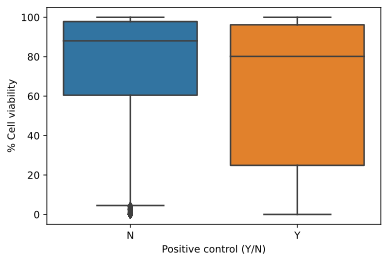

In [20]:
# Проверим, влияет ли тестирование на нормальный рост клеток
# на их жизнеспособность
sns.boxplot(data=db, x='Positive control (Y/N)', y=T)

In [21]:
# Почему-то после теста клетки чаще умирают...

<AxesSubplot:xlabel='Colloidal stability checked (Y/N)', ylabel='% Cell viability'>

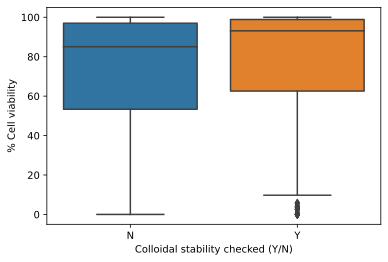

In [22]:
# Зависимость стабильности НЧ в растворе от жизнеспособности клетки
sns.boxplot(data=db, x='Colloidal stability checked (Y/N)', y=T)

In [23]:
# Стабильность НЧ в растворе -- полезно для клетки

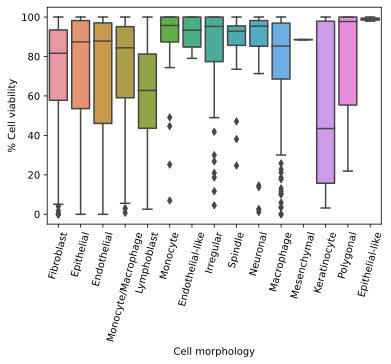

In [24]:
# Влияние типа ткани клетки на её жизнеспособность
sns.boxplot(data=db, y=T, x='Cell morphology')
_ = plt.xticks(rotation=75)

In [25]:
# Как видно, ткань 'Keratinocyte' не очень хороша для клеток.
# А, например, 'Monocyte', 'Endothelial-like', 'Irregular' -- довольно хороши.
# Ткань 'Epithelial-like' почему-то слишком хорошо себя показывает, возможно её кол-во
# в выборке очень мало.

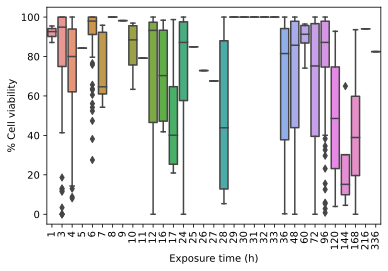

In [26]:
# Влияние времени инкубации материала с клетками на их жизнеспособность
sns.boxplot(data=db, y=T, x='Exposure time (h)')
_ = plt.xticks(rotation=90)

In [27]:
# Как можно видеть, в среднем, клеткам не полезно проводить
# много времени с НЧ.
# Чем больше времени с НЧ рядом прошло, тем выше риск для клеток.

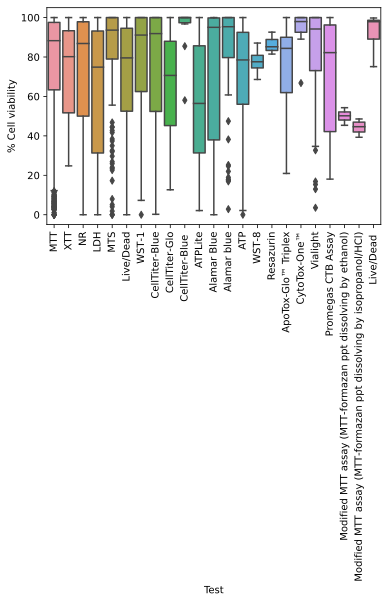

In [28]:
# Как тип теста для оценки токсичности материала
# влияет на показатель жизнеспособности
sns.boxplot(data=db, x='Test', y=T)
_ = plt.xticks(rotation=90)

In [29]:
# Методы определения 'CytoTox-One(tm)' и 'Live/Dead' дают наиболее утешительные результаты
# нежели остальные.

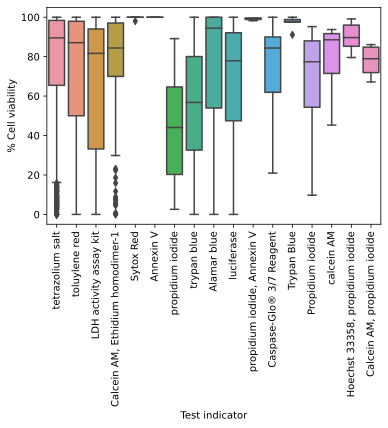

In [30]:
# Как использованный реагент для оценки токсичности материала
# влияет на показатель жизнеспособности
sns.boxplot(data=db, x='Test indicator', y=T)
_ = plt.xticks(rotation=90)

In [31]:
# 'Propidium iodide', 'LDH activity assay kit' часто дают небольшие результаты;
# 'Hoechst 33358, propidium iodide', 'Calcein AM, Propidium iodide' и др. очень часто дают хорошие результаты.

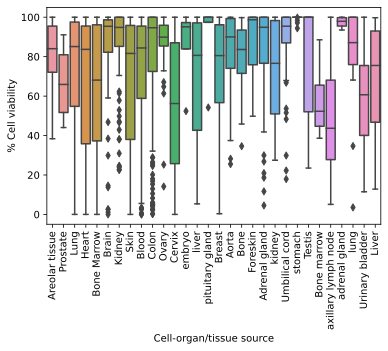

In [32]:
# Как орган, в котором находится клетка, влияет на её жизнеспособность
sns.boxplot(data=db, x='Cell-organ/tissue source', y=T)
_ = plt.xticks(rotation=90)

In [33]:
# В шейке матки и в печени жизнеспособность клеток не так высока.
# В яичнике, мозге, надпочечнике, гипофизе клетки более жизнеспособные. 

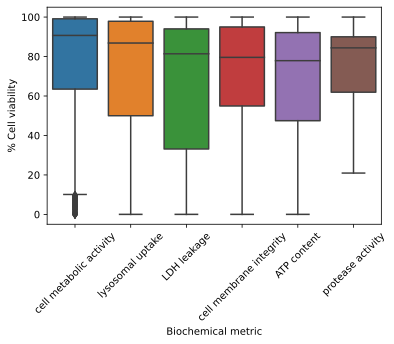

In [34]:
# Как метрика жизнеспособности клетки влияет на показатели
sns.boxplot(data=db, x='Biochemical metric', y=T)
_ = plt.xticks(rotation=45)

In [35]:
# 'Cell metabolic activity' чаще показывает хорошие результаты
# 'LDH leakage' чаще показывает плохие.

<AxesSubplot:xlabel='Human(H)/Animal(A) cells', ylabel='% Cell viability'>

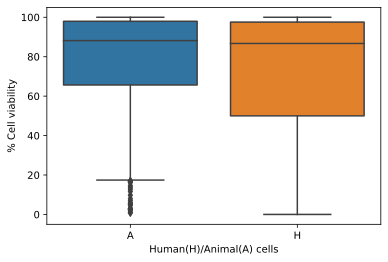

In [37]:
# Сравнение человеческих и животных клеток
# в противостоянии НЧ
sns.boxplot(data=db, x='Human(H)/Animal(A) cells', y=T)

In [38]:
# Животные клетки чуть лучше справляются.

<AxesSubplot:xlabel='Cell line (L)/primary cells (P)', ylabel='% Cell viability'>

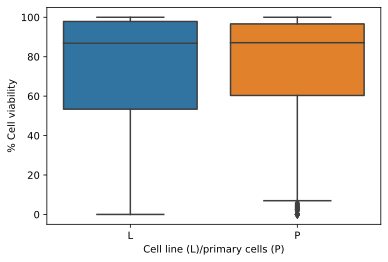

In [39]:
# Как тип клеток влияет на их жизнеспособность
sns.boxplot(data=db, x='Cell line (L)/primary cells (P)', y=T)

In [41]:
# Почти не влияет.

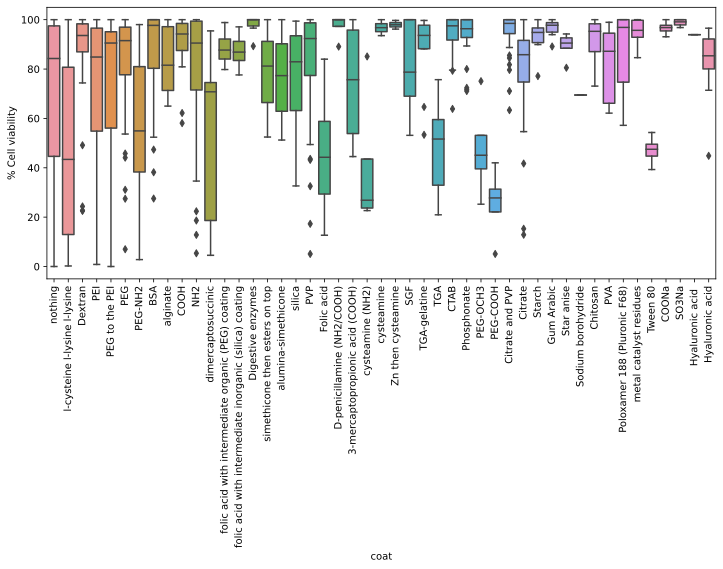

In [42]:
# Как поверхностная модификация влияет на
# жизнеспособность клеток
plt.figure(figsize=(12, 5))
sns.boxplot(data=db, x='coat', y=T)
_ = plt.xticks(rotation=90)

In [43]:
# 'l-cysteine l-lysine l-lysine' и 'dimercaotisuccinic' выделяются плохими показателями
# 'digestive enzymes', 'D-penicillamine' и др. показывают хорошую жизнеспособность клетки.

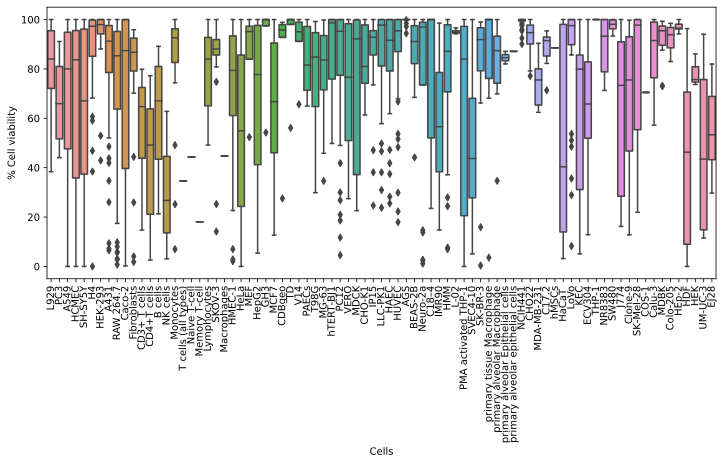

In [44]:
# Как тип клеточной линии влияет на её жизнеспособность
plt.figure(figsize=(12, 5))
sns.boxplot(data=db, x='Cells', y=T)
_ = plt.xticks(rotation=90)

In [45]:
# 'HEK-293', 'GH3', 'CDBgeo' и др. хорошо влияют на показатели жизнеспособности.
# 'HDF', 'UM-UC-3', 'HaCaT' -- плохо.

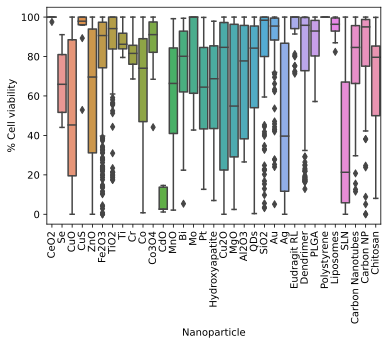

In [47]:
# Зависимость состава НЧ от жизнеспособности клетки
sns.boxplot(data=db, x='Nanoparticle', y=T)
_ = plt.xticks(rotation=90)

In [49]:
# CuO, SLN, Ag, CdO и др. НЧ оказывают скорее негативное влияние на клетки.
# CuS, Ti, Cr, Liposomes и др. НЧ особо не вредят.